<a href="https://isaic.ca/"> <center><img src="img/index.png" alt="Header" style="width: 200px;"/></center> </a>

> # Machine Learning Applications using Scikit Learn
>
> **Presentor:** Industry Sandbox and AI Computing (ISAIC)
>
> **Date:** 

In [21]:
#Load the required python modules
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', dpi=300)

## Introduction

[Scikit-learn](https://scikit-learn.org/stable/) provides fast and easy-to-use open source machine learning libraries in python. The package provides broad spectrum of data preprocessing tools, pre-built ML algorithms in both supervised and unsupervised learning (e.g. linear, logistic regression, clustering, classification etc.).

In this tutorial we will show an example use cases on how to use different regression tools on California housing dataset.

## Get the dataset : California Housing Price

The dataset can be directly loaded from the sklearn module. The dataset comes in partly preprocessed form whare the missing values are removed, some fields of the dataset scaled. Each datapoint (row) is an average of houses from each district in California. There are 8 input features for the houses and the output y value is the log value of the price.

In this tutorial, we will use simple regression tools from sklearn to predict the prices of the houses based on the given input features.

In [2]:
#loadting the dataset
housing_data = datasets.fetch_california_housing()

In [5]:
#check the dataset attributes (independent and dependent variables)
print (housing_data.feature_names)
print (housing_data.target_names)

#get the data into respective variables
X = housing_data.data
y = housing_data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


- `MedInc` is the median income of the block
- `HouseAge` gives the age of the house in years
- `AveRooms` is the average number of rooms in the house
- `AveBedarms` is the number of bedrooms
- `Population` is the average population of the district
- `AveOccup` is the number of people in each household
- `Latiitude` and `Longitude` is the geographical coordinates of the houses
- `MedhouseVal` gives the median house price in the district in logscale

## Visualizing the data: Housing price heatmap

Let us visualize the data by plotting the geolocation of the houses and their prices as the colormap on the scatter plot.

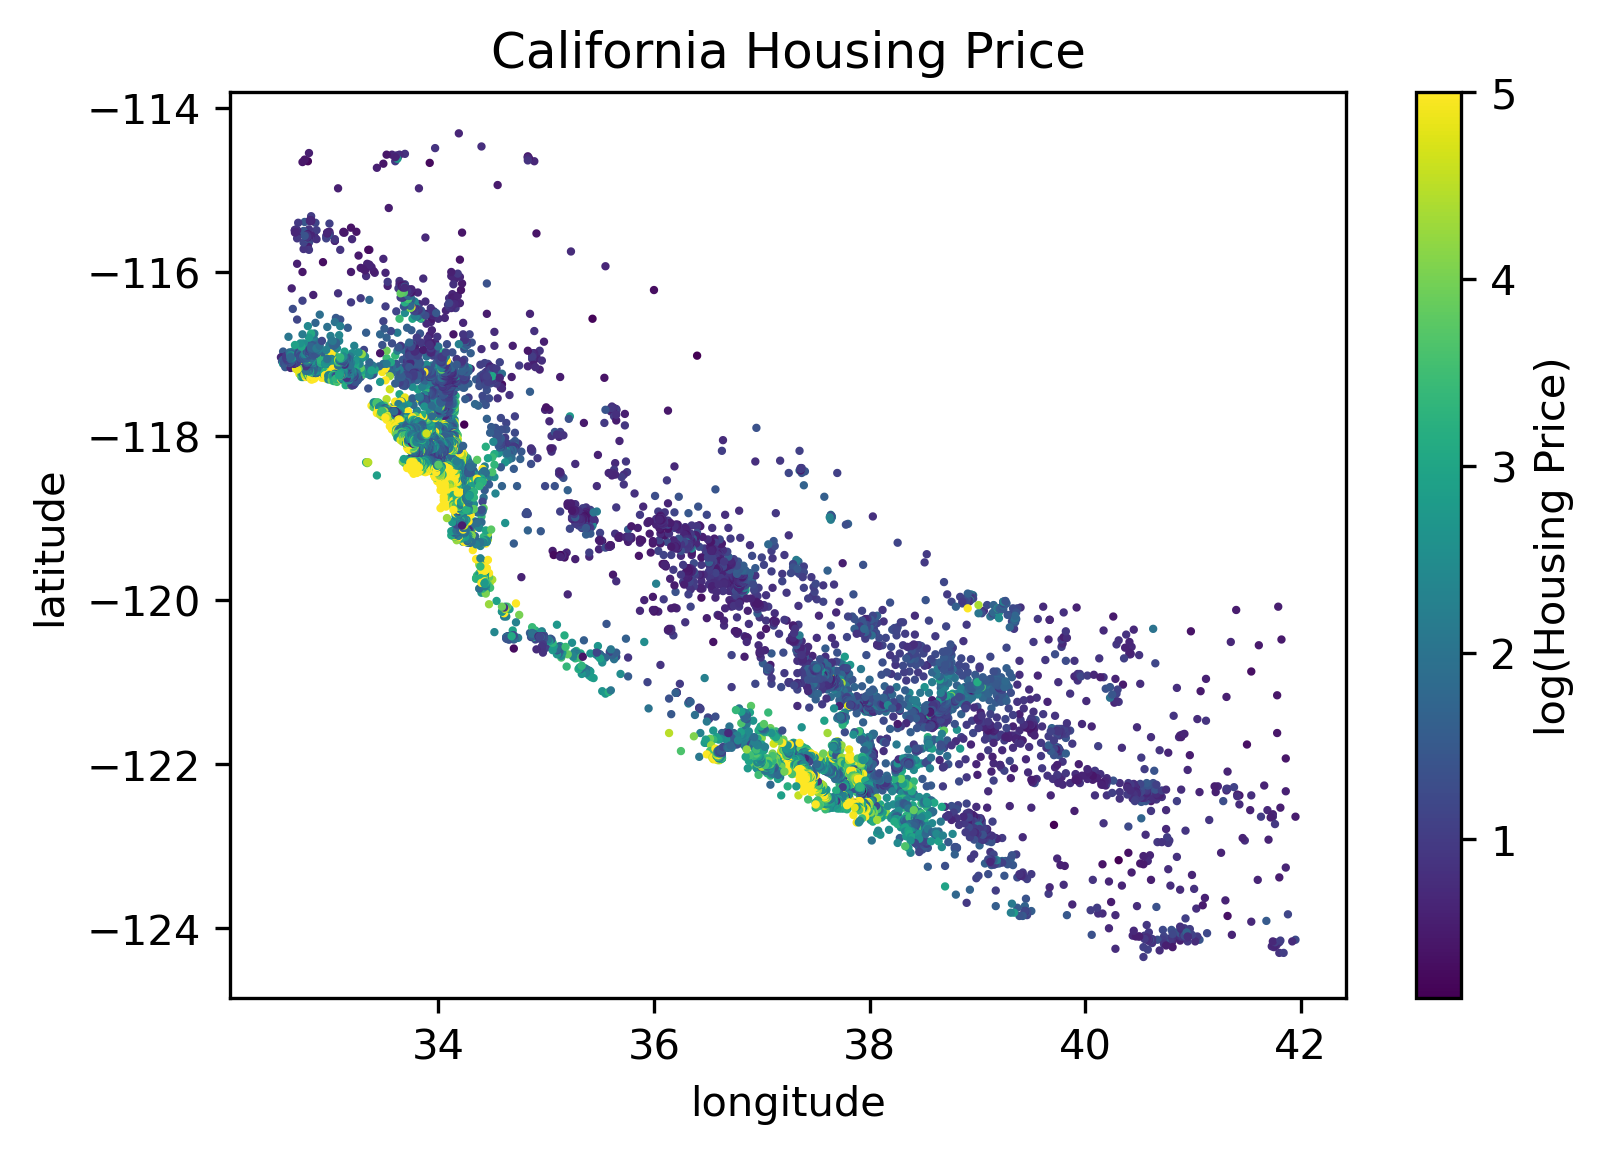

In [6]:
plt.figure()
plt.scatter(X[:,6], X[:,7], s=1, c=y)
plt.colorbar(label='log(Housing Price)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('California Housing Price')
plt.show()

## Check data distributions

Before applying any machine learning algorithms, let us check the distributions of the input features and if we need to perform any preprocessing. For simplicity and speeding up the computation time, we will only work with the first 4 features of the houses to predict their values (i.e. income, house age, average number of rooms and bedrooms).

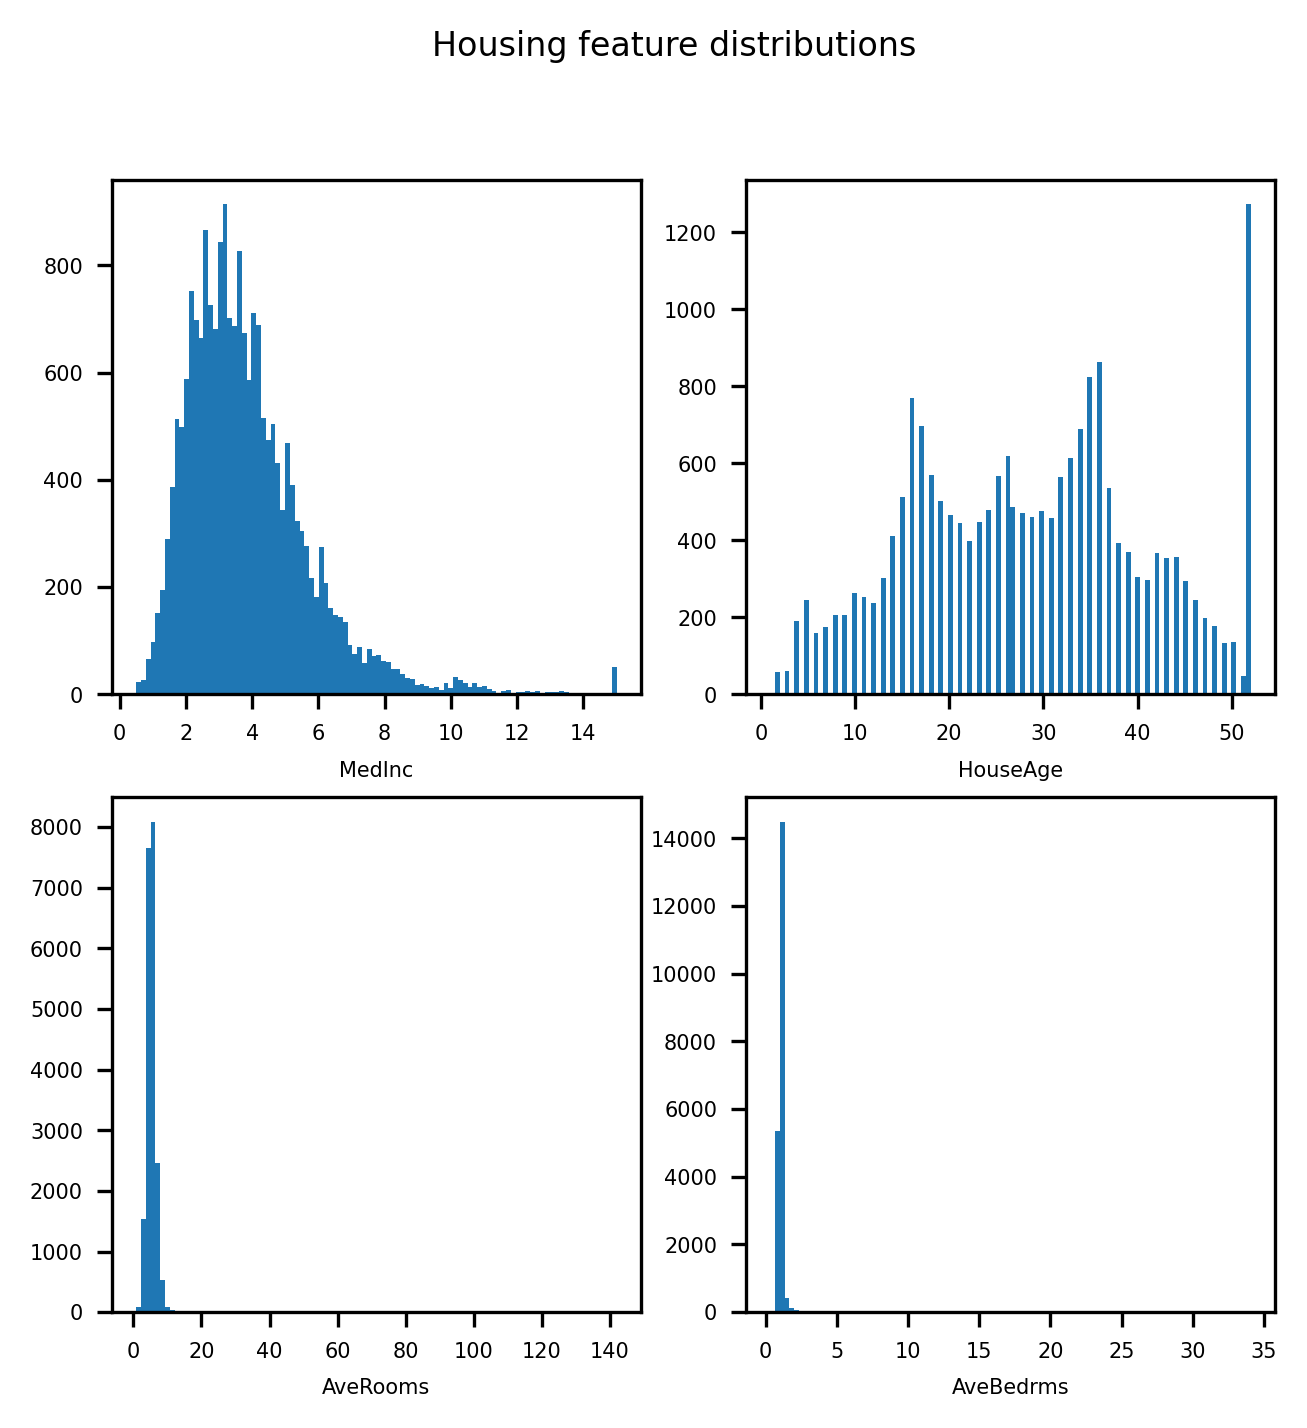

In [7]:
# check the data distributions
mpl.rc('xtick', labelsize=5) 
mpl.rc('ytick', labelsize=5) 

features = housing_data.feature_names[:4]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(5,5))

fig.suptitle('Housing feature distributions', fontsize=8)
ax1.hist(X[:,0], bins=100)
ax1.set_xlabel(features[0], fontsize=5)
ax2.hist(X[:,1], bins=100)
ax2.set_xlabel(features[1], fontsize=5)
ax3.hist(X[:,2], bins=100)
ax3.set_xlabel(features[2], fontsize=5)

ax4.hist(X[:,3], bins=100)
ax4.set_xlabel(features[3], fontsize=5)

plt.show()

## Data preprocessing

From the above distributions, we see that the range of the distributions are not too different from each other. We therefor do not need to perform any heavy preprocessing, however, we can perform simle standardization scaling to make each dataset centered around its mean value and spread by the standard deviation.

SKlearn provides a class called `StandardScaler` that computes the mean and standard deviation and transforms the dataset. We also split the dataset into training and testing for checking the performance of the fit from each model.

In [16]:
#split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:,:4], y, test_size=0.2, random_state=55)

#scale the dataset
from sklearn.preprocessing import StandardScaler
def scale_dataset(X):
    #get the scalar object
    scalar = StandardScaler()
    #fit each feature to get the mean and std values
    scalar.fit(X)
    #return the transformed data using mean and std
    return scalar.transform(X)

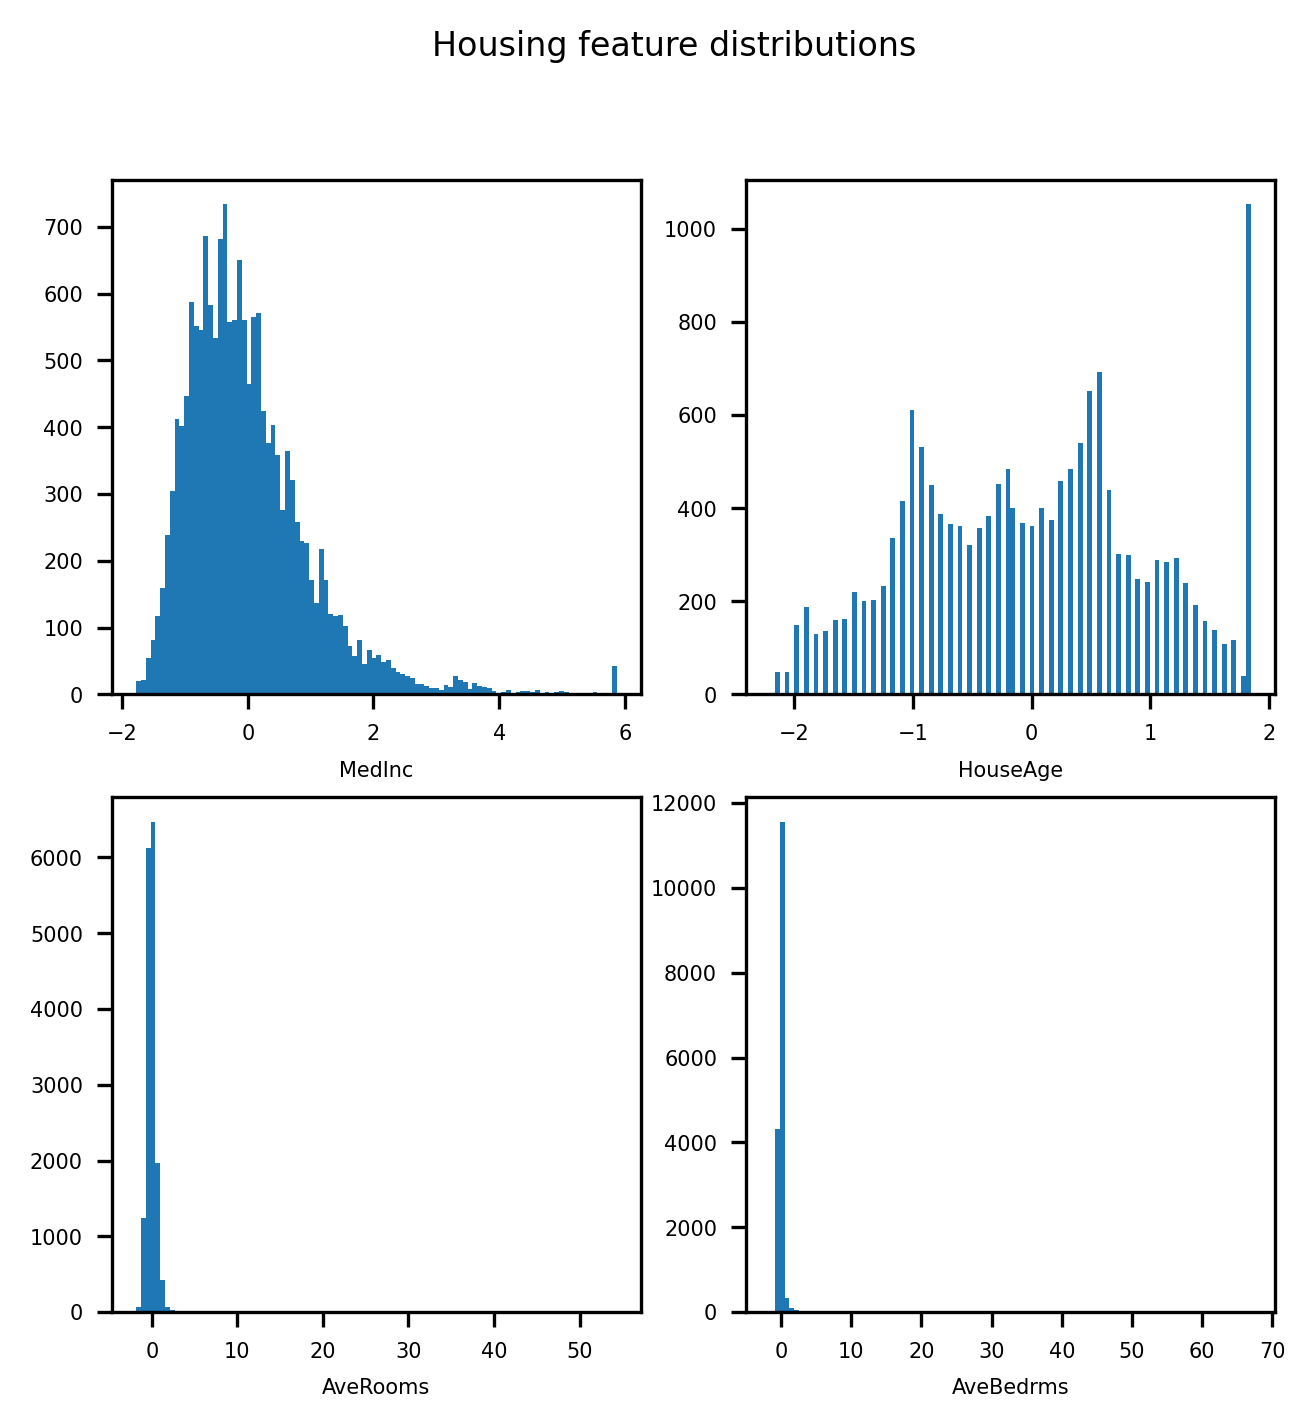

In [17]:
X_train = scale_dataset(X_train)
X_test = scale_dataset(X_test)

#check back the propoerties
features = housing_data.feature_names[:4]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(5,5))

fig.suptitle('Housing feature distributions', fontsize=8)
ax1.hist(X_train[:,0], bins=100)
ax1.set_xlabel(features[0], fontsize=5)
ax2.hist(X_train[:,1], bins=100)
ax2.set_xlabel(features[1], fontsize=5)
ax3.hist(X_train[:,2], bins=100)
ax3.set_xlabel(features[2], fontsize=5)

ax4.hist(X_train[:,3], bins=100)
ax4.set_xlabel(features[3], fontsize=5)

plt.show()

## Linear regression

Now that the dataset is properly scaled, we can perform regression fit. The first algorithm we will try is the simple linaer regression. We will keep the settings of the linear fit same as sklearn default to show how fast and easy the solution is using pre-built algorithms.

In [18]:
#loading the linear regression class
from sklearn.linear_model import LinearRegression

#getting the regression object
lin_reg = LinearRegression()
#performing the fit on training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
#Checking the predictions and visually comparing them with the true output value

print("Predictions:", lin_reg.predict(X_test))

print("True values:", y_test)

Predictions: [2.59851904 6.43206004 2.5115726  ... 1.57800538 1.68748097 1.18865869]
True values: [2.657   5.00001 0.889   ... 1.128   2.061   0.808  ]


## Model performance comparison

In order to quntitavely compare the performance of the goodness of the fits from each different models, we compute the root mean squared (RMS) error on the test sample. 

In [23]:
#import the mean squared error class from sklearn
from sklearn.metrics import mean_squared_error

#compute the prediction
linear_pred = lin_reg.predict(X_test)
#compute the mean squared error
lin_mse = mean_squared_error(y_test, linear_pred)
#take the root of the squared values to get RMS
lin_rmse = np.sqrt(lin_mse)
#check the value
lin_rmse



0.8012514238417054

## Support Vector Machines (SVM)

SVM is another ML algorthim that efficiently performs regression fit using different functions called kernels.

In [24]:
from sklearn import svm

#we will use the default model settings from sklearn for the first SVM example
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)

SVR()

In [25]:
print("Predictions:", svm_reg.predict(X_test))

print("True values:", y_test)

Predictions: [3.14289381 5.07269203 2.80958986 ... 1.2947495  1.48062033 0.82227038]
True values: [2.657   5.00001 0.889   ... 1.128   2.061   0.808  ]


In [26]:
svr_pred = svm_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, svr_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


0.7294873575193807

We notice that the SVM performs better and gives less error compared to the simple linear regression algortihm.

- **Using different kernels for SVM**

Let us now check the use of different kernel functions for the same SVM algorithm and compare their performance.

In [87]:
#SVM using rbf kernel
svm_rbf = svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svm_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [88]:
rbf_pred = svm_rbf.predict(X_test)
lin_mse = mean_squared_error(y_test, rbf_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


0.7325943995797394

In [ ]:
#SVM using polynomial kernel
svm_poly = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svm_poly.fit(X_train, y_train)

In [ ]:
poly_pred = svm_poly.predict(X_test)
lin_mse = mean_squared_error(y_test, poly_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


In [25]:
#SVM using linear kernel
svm_lin = svm.SVR(kernel="linear", C=100, gamma="auto")
svm_lin.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [26]:
lin_pred = svm_lin.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


0.815906997049051

# Visulaizing the fit results

Now that we have built models to predict the california housing price, let us visualiza the prediction in comparison with the true housing prices. For this, we will use the best preformed model (i.e. SVM default) to predict the prices.

In [27]:
#using the entire dataset

X_f = scale_dataset(X[:,:4])
housing_pred = svm_reg.predict(X_f)

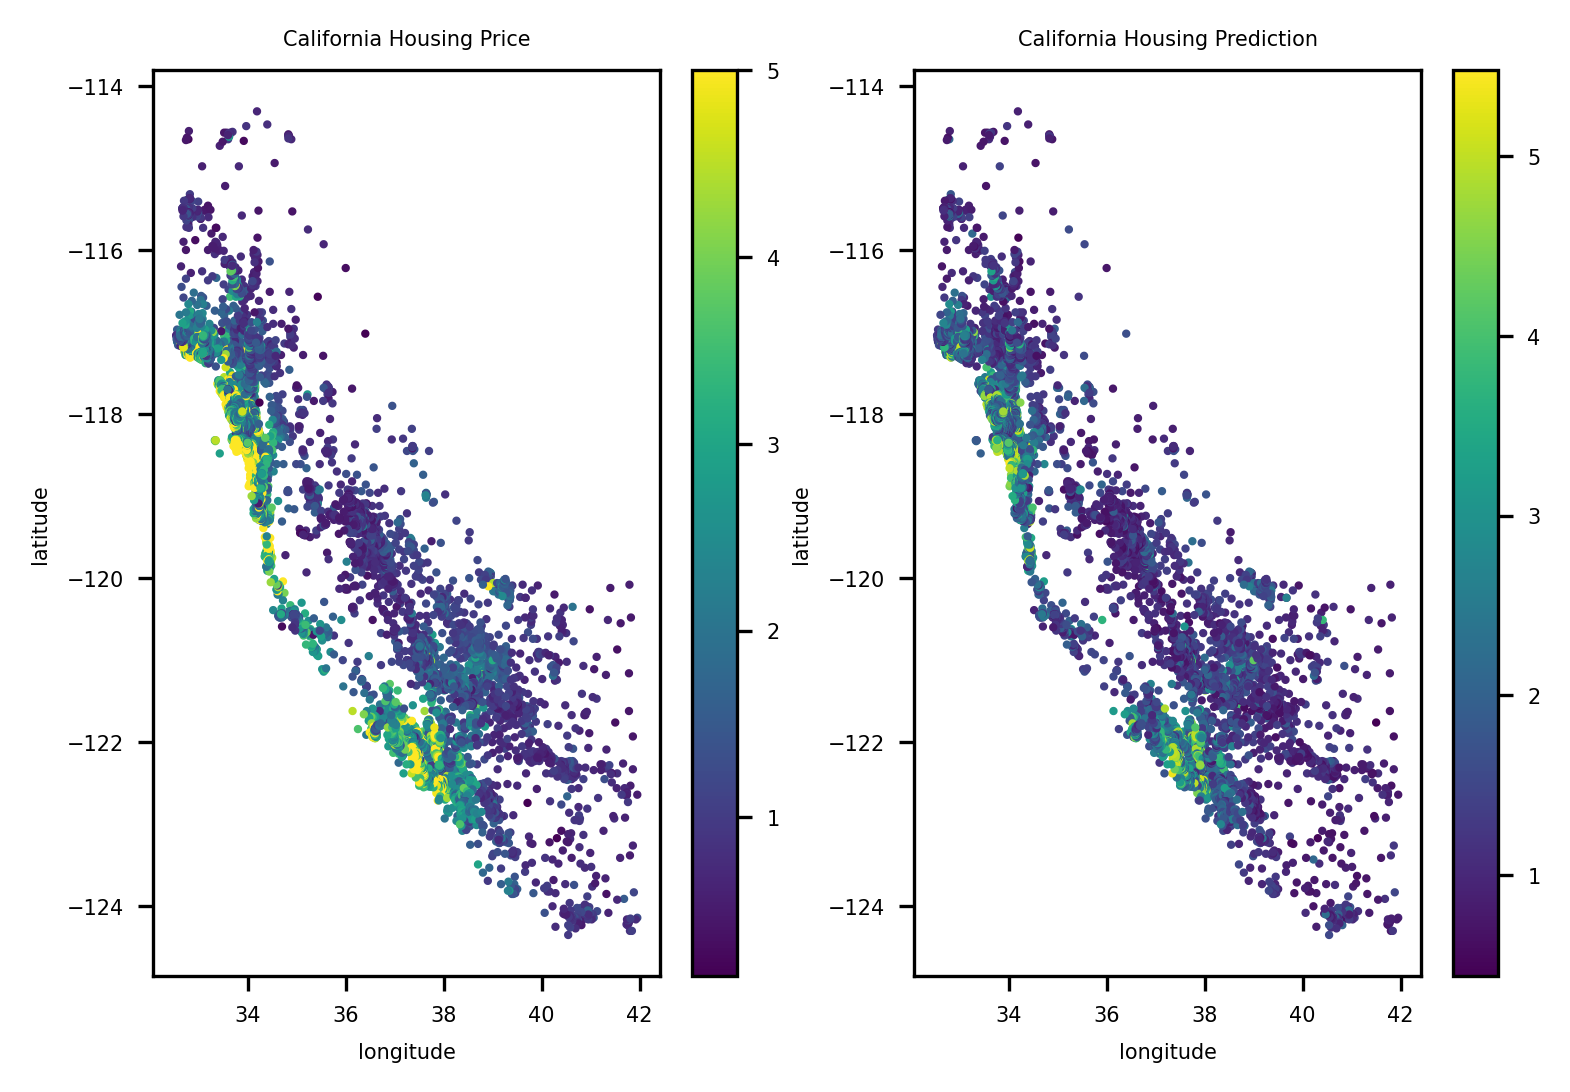

In [24]:
#plot the heatamp again, but this time using the predicted housing price
fig, (ax1, ax2) = plt.subplots(1,2)

im=ax1.scatter(X[:,6], X[:,7], s=1, c=y)
plt.colorbar(im, ax=ax1)
ax1.set_xlabel('longitude', fontsize=5)
ax1.set_ylabel('latitude', fontsize=5)
ax1.set_title('California Housing Price', fontsize=5)

im2=ax2.scatter(X[:,6], X[:,7], s=1, c=housing_pred)
plt.colorbar(im2, ax=ax2)
ax2.set_xlabel('longitude', fontsize=5)
ax2.set_ylabel('latitude', fontsize=5)
ax2.set_title('California Housing Prediction', fontsize=5)
plt.show()

The left side plot shows the true house prices (in colormap) and the right hand side shows the predicted housing prices. Even though we have not use the geographic location for out model fit (we only used the first 4 input features), we notice that the model somewhat accurately predicts the housing prices based on the geographic location (i.e. the houses with oceanic view have very high prices compared to the ones that are inland). 